<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/Analisis_BioInformatico_Artritis_2_reumatoide_juan_cuevas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Bio

     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 2.3 MB 17.5 MB/s 


In [2]:
#Import biopython libraries
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO



la funciones creadas muestran la fase de traduccion en el cual se sustituira el nucleotido T por U este proceso es creado por la celula para posteriormenete crear aminocidos

In [3]:
#LECTURA  the DNA sequence
AR = SeqIO.read("/content/ar1.fasta", "fasta")

#Display the first 1000 nucleotides in the Covid-19's DNA
AR_DNA= AR.seq
print( AR_DNA[:100])

CACGTTTCCTGTGGCAGCCTAAGAGGGAGTGTCATTTCTTCAATGGGACGGAGCGGGTGCGGTTCCTGGACAGATACTTCTATAATCAGGAGGAGTCCGT


aca mostramos la frecuencia y catidad de nucleotidos

In [4]:
import pandas as pd

In [5]:
#conteo de frecuencia de nucleotidos
DNA= AR_DNA
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#Create a dataframe
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)
print(nts)

{'C': 59, 'A': 49, 'G': 92, 'T': 46}
  nucleotides  frequency
3           T         46
1           A         49
0           C         59
2           G         92


con la funcion trancribe se crea el ARN la arquitectura molecular que  permitira a la celula crear atravez de la arn polimeraza los aminoacidos de cualquier ser vivo en este caso HOMO_SAPPIENS SER HUMANO CON ARTRITIS REUMATOIDE.

In [6]:
AR_DNA= AR.seq

#Transcrpcion DNA a RNA CON  transcribe() funcion
ar_mRNA = AR_DNA.transcribe()
print(ar_mRNA[:100])

CACGUUUCCUGUGGCAGCCUAAGAGGGAGUGUCAUUUCUUCAAUGGGACGGAGCGGGUGCGGUUCCUGGACAGAUACUUCUAUAAUCAGGAGGAGUCCGU


en este evento crea la linea de aminoacidos el mismo sistema creado por la celula humana.

In [7]:
#traduccion de arn mensajero a aminoacidos 
ar_aa = ar_mRNA.translate()
print(ar_aa[:99])

HVSCGSLRGSVISSMGRSGCGSWTDTSIIRRSPCASTATWGSSGR*RSWGGLTLSTGTARRTSWSRRGPRWTPTADTTTGLV


In [11]:
ar_amino = "HVSCGSLRGSVISSMGRSGCGSWTDTSIIRRSPCASTATWGSSGR*RSWGGLTLSTGTARRTSWSRRGPRWTPTADTTTGLV"

la primera linea de ADN  Analizada nos muestra la cantidad de 82 aminoacidos que posteriormente creara la proteina HLA presente en las personas con la enfermedad de artritis reumatoide.
by Juan Cuevas Vasquez
Cientifico de Datos

In [8]:
print(f"artritis_reumatoide genoma tiene una longitud de {len(ar_aa)} aminoacidos")

artritis_reumatoide genoma tiene una longitud de 82 aminoacidos


PROTEINA HLA PRESENTE EN EL ADN DE LA PERSONA EN ANALISIS

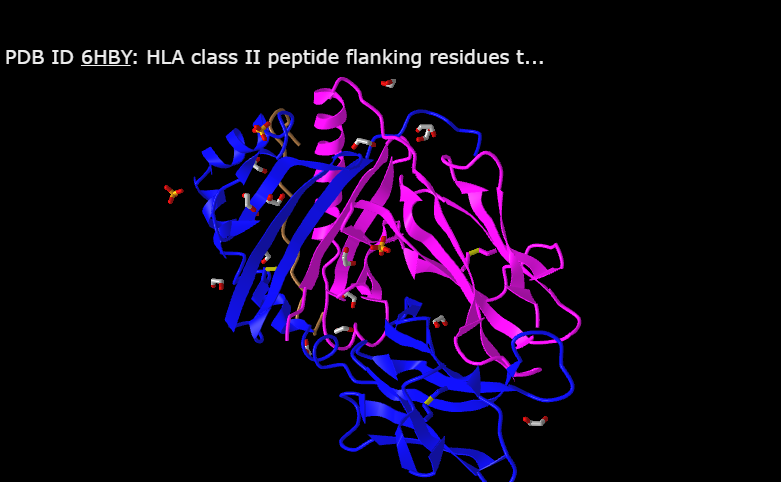

In [9]:
proteinas = ar_aa.split('*')
proteinas[:100]

[Seq('HVSCGSLRGSVISSMGRSGCGSWTDTSIIRRSPCASTATWGSSGR'),
 Seq('RSWGGLTLSTGTARRTSWSRRGPRWTPTADTTTGLV')]

HVSCGSLRGSVISSMGRSGCGSWTDTSIIRRSPCASTATWGSSGR = MHC ClassII HLA-DR-beta 1 chain [Homo sapiens]

NOTA:SE VERIFICA QUE EN EL PRIMER ANALISIS ar1 en respuesta a la consulta en la base de datos NCBI centro internacional de biotecnologia da por resultado que la linea de aminoacidos crea la proteina HLA presente en las personas afectadas por la rtritis reumatoide.la linea de nucleotidos presenta en NCBI es real en terminos de ciencia de la informacion.
Algoritmo creado por juan cuevas vasquez

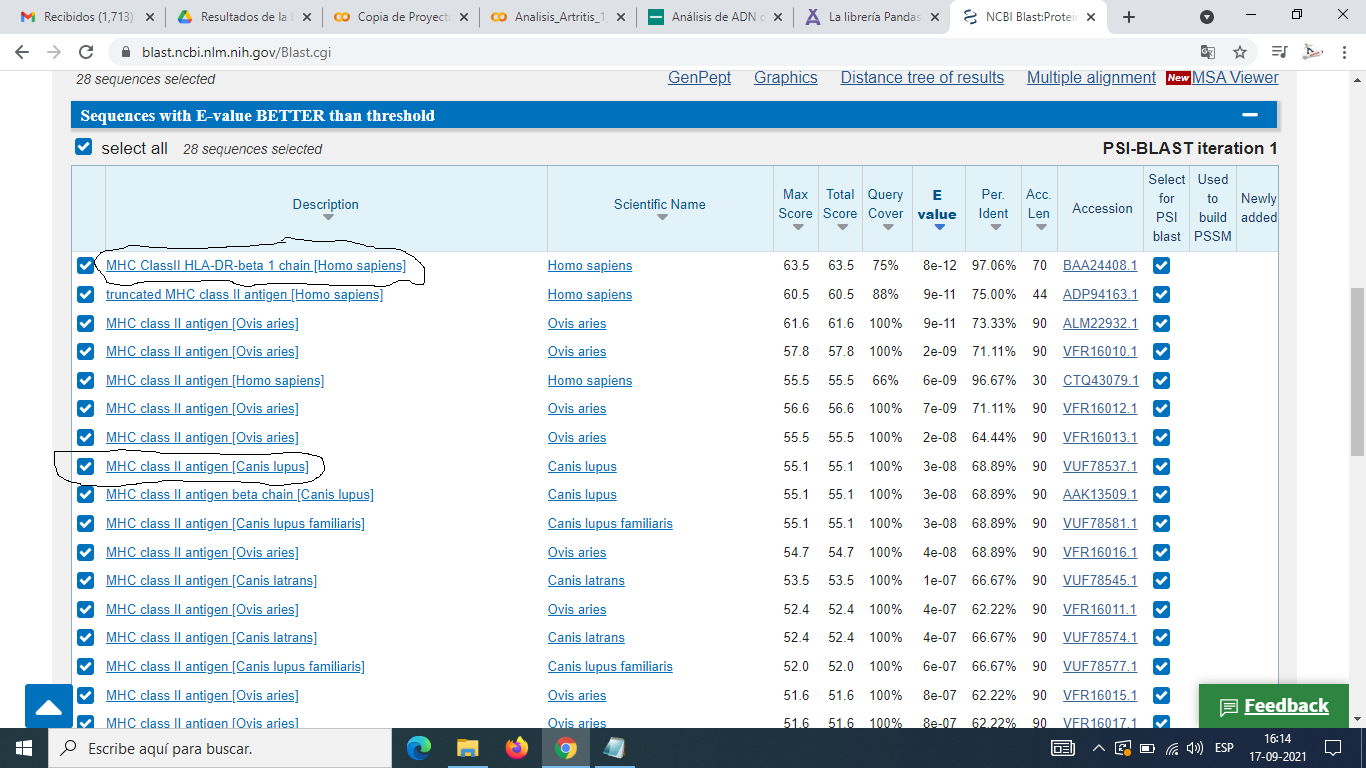

2º ANALISIS DE AR

In [14]:
#recuento de aminoacidos
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [21]:
ar_protein = SeqIO.read("/content/ar1.fasta","fasta")

In [22]:
ar_analysed = ProteinAnalysis(str(ar_protein))

In [23]:
print(ar_analysed)

In [24]:
ar_analysed.count_amino_acids()

{'A': 15,
 'C': 12,
 'D': 6,
 'E': 0,
 'F': 0,
 'G': 19,
 'H': 2,
 'I': 1,
 'K': 0,
 'L': 1,
 'M': 0,
 'N': 2,
 'P': 0,
 'Q': 1,
 'R': 3,
 'S': 1,
 'T': 15,
 'V': 0,
 'W': 0,
 'Y': 0}

In [25]:
#frecuencia de aminoacidos
from collections import Counter

In [26]:
ar_freq = Counter(ar_protein)

In [27]:
ar_freq

Counter({'A': 49, 'C': 59, 'G': 92, 'T': 46})

In [28]:
Counter(ar_protein).most_common(10)
#Aminoácido más común en Artritis reumatoide

[('G', 92), ('C', 59), ('A', 49), ('T', 46)]

In [29]:
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

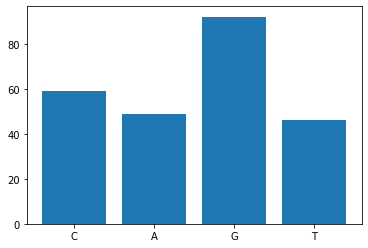

In [30]:
plt.bar(ar_freq.keys(), ar_freq.values())
#grafico de aminoacidos de ARTRITIS REUMATOIDE 

ACA OBSERVAMOS UNA EVIDENTE CANTIDAD DE (G) EN CODIGO GENETICO DE ARTRITIS REUMAOIDE 
by Juan Cuevas Vasquez

In [36]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment


In [39]:
ar_protein = SeqIO.read("/content/ar1.fasta","fasta")

In [40]:
ar_protein

SeqRecord(seq=Seq('CACGTTTCCTGTGGCAGCCTAAGAGGGAGTGTCATTTCTTCAATGGGACGGAGC...GTG'), id='AJ001253.1', name='AJ001253.1', description='AJ001253.1 Homo sapiens HLA-DRB1 gene, exon 2, allele DRB1*15/DRB5*0101/DQB1*05031', dbxrefs=[])

In [41]:
ar_seq = ar_protein.seq

In [42]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [43]:
alignments = pairwise2.align.globalxx(ar_seq,ar_protein)

In [44]:
print(alignments)

[Alignment(seqA='CACGTTTCCTGTGGCAGCCTAAGAGGGAGTGTC----ATTTCTTC----------------A-----------------------ATGGG-------------------------A-----------------------------------------------------------------------------------CGGAGCGGGTGCGGTTCCTGGACAGATACTTCTATAATCAGGAGGAGTCCGT-GCGCTTCGACAGCGACGTGGGGGAGTTCCGGGCGGTGACGGAGCTGGGGCGGCCTGACGCTGAGTACTGGAACAGC-CAGAAGGACATCCTGGAGCAGGCGCGGGCCGCGGTGGACACCTACTGCAGACACAACTACGGGGTTG---GTG--', seqB="---------------------------------ID: A-------J001253.1\nName: AJ001253.1\nDescription: A----J001253.1 Homo sapiens HLA-DRB1 gene, exon 2, allele DRB1*15/DRB5*0101/DQB1*05031\nNumber of features: 0\nSeq('C--A-C--GT----TTCCT-----G------------T------G-G--C--AGC-C-T--A-A--GA-----GGGAG-T-------GT--C--A------------T-----T---T-CT--------TC------A-A---TGG-G-A-----------C----G---------G-AG---------C-------...GTG')", score=59.0, start=0, end=404), Alignment(seqA='CACGTTTCCTGTGGCAGCCTAAGAGGGAGTGTC---ATTTCTTC----------------A-----------------------ATGGG-----------------------

In [45]:
# To See it well
print(format_alignment(*alignments[0]))
#podemos identificar el antigen tumor en p53

CACGTTTCCTGTGGCAGCCTAAGAGGGAGTGTC----ATTTCTTC----------------A-----------------------ATGGG-------------------------A-----------------------------------------------------------------------------------CGGAGCGGGTGCGGTTCCTGGACAGATACTTCTATAATCAGGAGGAGTCCGT-GCGCTTCGACAGCGACGTGGGGGAGTTCCGGGCGGTGACGGAGCTGGGGCGGCCTGACGCTGAGTACTGGAACAGC-CAGAAGGACATCCTGGAGCAGGCGCGGGCCGCGGTGGACACCTACTGCAGACACAACTACGGGGTTG---GTG--
                                     |                       |                       |                             ||                                                                                  |  | |  ||    |||||     |            |      | |  |   || | |  | |  ||     ||||| |       ||  |  |            |     |   | ||         |      | |   ||| | |           |    |         | ||         |          |||  
---------------------------------ID: A-------J001253.1
Name: AJ001253.1
Description: A----J001253.1 Homo sapiens HLA-DRB1 gene, exon 2, allele DRB1*15/DRB5*0101/DQB1*05031
Number of features

El gen HLA-DRB1 proporciona instrucciones para producir una proteína que desempeña un papel fundamental en el sistema inmunológico. El gen HLA-DRB1 es parte de una familia de genes denominada complejo de antígeno leucocitario humano (HLA). El complejo HLA ayuda al sistema inmunológico a distinguir las proteínas propias del cuerpo de las proteínas producidas por invasores extraños como virus y bacterias.

El complejo HLA es la versión humana del complejo principal de histocompatibilidad (MHC), una familia de genes que se encuentra en muchas especies. El gen HLA-DRB1 pertenece a un grupo de genes MHC llamado MHC clase II. Los genes del MHC de clase II proporcionan instrucciones para producir proteínas que están presentes en la superficie de ciertas células del sistema inmunológico. Estas proteínas se unen a fragmentos de proteínas (péptidos) fuera de la célula. Las proteínas del MHC de clase II presentan estos péptidos al sistema inmunológico. Si el sistema inmunológico reconoce los péptidos como extraños (como péptidos virales o bacterianos), desencadena una respuesta para atacar a los virus o bacterias invasores.

La proteína producida a partir del gen HLA-DRB1 , llamada cadena beta, se une (se une) a otra proteína llamada cadena alfa, que se produce a partir del gen HLA-DRA . Juntos, forman un complejo proteico funcional llamado heterodímero de unión al antígeno HLA-DR. Este complejo muestra péptidos extraños al sistema inmunológico para desencadenar la respuesta inmunitaria del cuerpo.

Cada gen del MHC de clase II tiene muchas variaciones posibles, lo que permite que el sistema inmunológico reaccione a una amplia gama de invasores extraños. Los investigadores han identificado cientos de versiones diferentes (alelos) del gen HLA-DRB1 , a cada una de las cuales se le asigna un número particular (como HLA-DRB1 * 04: 01).